In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("./bc.csv") 

In [5]:
data.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1,3,1,1,benign
1,2,1002945,5,4,4,5,7,10,3,2,1,benign
2,3,1015425,3,1,1,1,2,2,3,1,1,benign
3,4,1016277,6,8,8,1,3,4,3,7,1,benign
4,5,1017023,4,1,1,3,2,1,3,1,1,benign


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 86 to 355
Data columns (total 12 columns):
Unnamed: 0         546 non-null int64
Id                 546 non-null int64
Cl.thickness       546 non-null int64
Cell.size          546 non-null int64
Cell.shape         546 non-null int64
Marg.adhesion      546 non-null int64
Epith.c.size       546 non-null int64
Bare.nuclei        546 non-null int64
Bl.cromatin        546 non-null int64
Normal.nucleoli    546 non-null int64
Mitoses            546 non-null int64
Class              546 non-null object
dtypes: int64(11), object(1)
memory usage: 55.5+ KB


In [8]:
data["Mitoses"].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [9]:
data.describe()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
count,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,352.355783,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,202.563927,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.500000,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,356.000000,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,527.500000,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,699.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


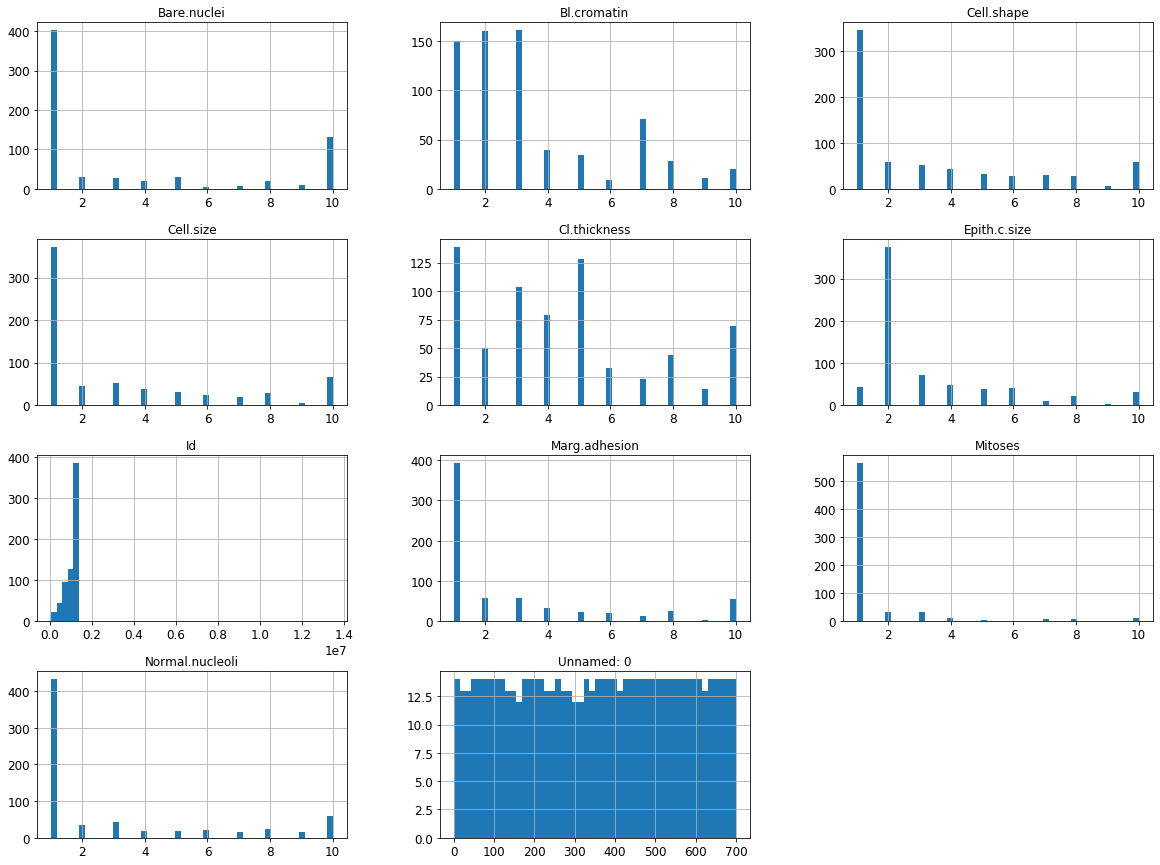

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)

547

In [16]:
len(test_set)

136

In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [19]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
test_set.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
292,305,653777,8,3,4,9,3,10,3,3,1,malignant
145,150,1187805,8,8,7,4,10,10,7,8,7,malignant
211,218,1223426,1,1,1,1,2,1,3,1,1,benign
118,121,1174057,1,1,2,2,2,1,3,1,1,benign
302,315,704097,1,1,1,1,1,1,2,1,1,benign


In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
test_set.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
292,305,653777,8,3,4,9,3,10,3,3,1,malignant
145,150,1187805,8,8,7,4,10,10,7,8,7,malignant
211,218,1223426,1,1,1,1,2,1,3,1,1,benign
118,121,1174057,1,1,2,2,2,1,3,1,1,benign
302,315,704097,1,1,1,1,1,1,2,1,1,benign


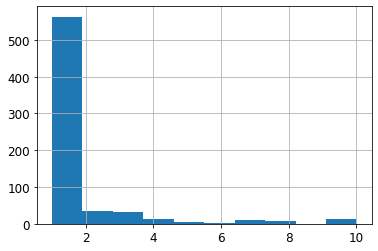

In [25]:
data["Mitoses"].hist()

In [26]:
data["mit_cat"] = pd.cut(data["Mitoses"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [27]:
data["mit_cat"].value_counts()

1    563
2     68
5     31
3     12
4      9
Name: mit_cat, dtype: int64

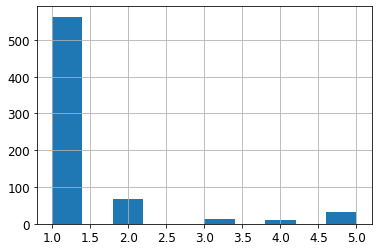

In [28]:
data["mit_cat"].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["mit_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [31]:
strat_test_set["mit_cat"].value_counts() / len(strat_test_set)

1    0.824818
2    0.102190
5    0.043796
4    0.014599
3    0.014599
Name: mit_cat, dtype: float64

In [34]:
data["mit_cat"].value_counts() / len(data)

1    0.824305
2    0.099561
5    0.045388
3    0.017570
4    0.013177
Name: mit_cat, dtype: float64

In [35]:
def mit_cat_proportions(data):
    return data["mit_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": mit_cat_proportions(data),
    "Stratified": mit_cat_proportions(strat_test_set),
    "Random": mit_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [36]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.824305,0.824818,0.795620,-3.479794,0.062232
2,0.099561,0.102190,0.102190,2.640618,2.640618
3,0.017570,0.014599,0.014599,-16.909976,-16.909976
4,0.013177,0.014599,0.014599,10.786699,10.786699
5,0.045388,0.043796,0.072993,60.819402,-3.508359


In [37]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("mit_cat", axis=1, inplace=True)

In [38]:
data = strat_train_set.copy()

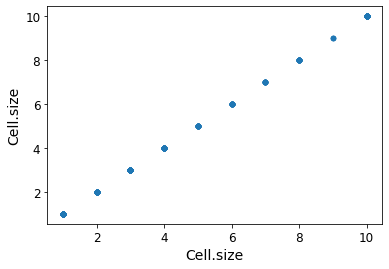

In [41]:
data.plot(kind="scatter", x="Cell.size", y="Cell.size")

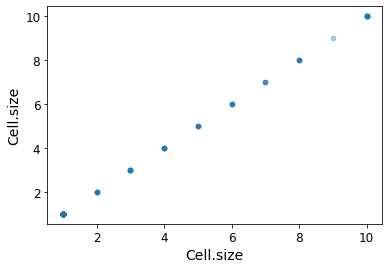

In [43]:
data.plot(kind="scatter", x="Cell.size", y="Cell.size", alpha=0.1)

In [44]:
corr_matrix = data.corr()

In [45]:
corr_matrix["Mitoses"].sort_values(ascending=False)

Mitoses            1.000000
Epith.c.size       0.479717
Cell.size          0.444212
Cell.shape         0.422665
Normal.nucleoli    0.400128
Marg.adhesion      0.384044
Bare.nuclei        0.347251
Cl.thickness       0.320665
Bl.cromatin        0.308255
Id                -0.047772
Unnamed: 0        -0.166091
Name: Mitoses, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa2595dac8>,
      dtype=object)

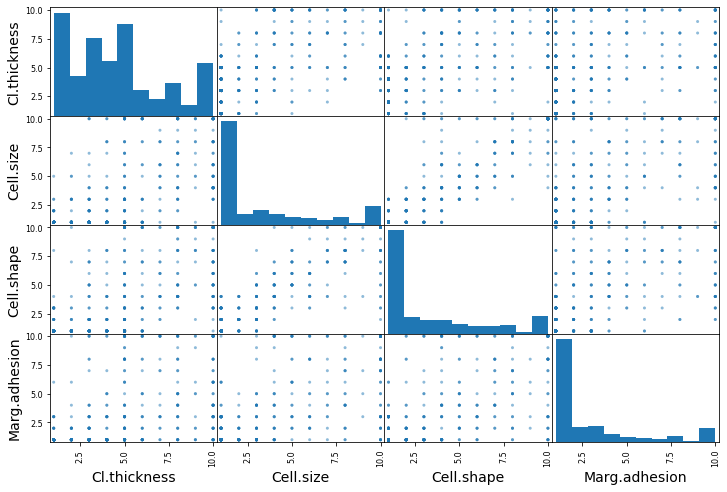

In [46]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Cl.thickness", "Cell.size", "Cell.shape",
              "Marg.adhesion"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [49]:
data = strat_train_set.drop("Id", axis=1) # drop labels for training set
data_labels = strat_train_set["Id"].copy()

In [50]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,Unnamed: 0,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class


In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [53]:
class_cat = data[["Class"]]
class_cat.head(10)

,Class
86,benign
137,benign
526,benign
503,benign
125,benign
680,malignant
360,benign
172,benign
181,malignant
90,benign


In [54]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
class_cat_encoded = ordinal_encoder.fit_transform(class_cat)
class_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [55]:
ordinal_encoder.categories_

[array(['benign', 'malignant'], dtype=object)]

In [56]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
class_cat_1hot = cat_encoder.fit_transform(class_cat)
class_cat_1hot

<546x2 sparse matrix of type '<class 'numpy.float64'>'
	with 546 stored elements in Compressed Sparse Row format>

In [57]:
class_cat_1hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [58]:
cat_encoder = OneHotEncoder(sparse=False)
class_cat_1hot = cat_encoder.fit_transform(class_cat)
class_cat_1hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [59]:
cat_encoder.categories_

[array(['benign', 'malignant'], dtype=object)]